# ImageNette

Classical ImageNet dataset is 1.3 million images of various sizes around 500 pixels across, in 1,000 categories, which took a few days to train.

**ImageNette** is a subset of ImageNet with 10 very different classes. It's great to quickly experiment before trying a fleshed-out technique on the full ImageNet dataset.

## 1) Setup

In [ ]:
!pip install fastai2
from fastai2.vision.all import *

## 2) Data

In [ ]:
path = untar_data(URLs.IMAGENETTE)

In [ ]:
get_image_files(path/'train')

(#9469) [Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_5543.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_1809.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_128.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_36028.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_19079.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_7766.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_38373.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_6059.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_949.JPEG'),Path('/root/.fastai/data/imagenette2/train/n03888257/n03888257_4345.JPEG')...]

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid='val', 
        item_tfms=RandomResizedCrop(128, min_scale=0.35), batch_tfms=Normalize.from_stats(*imagenet_stats))

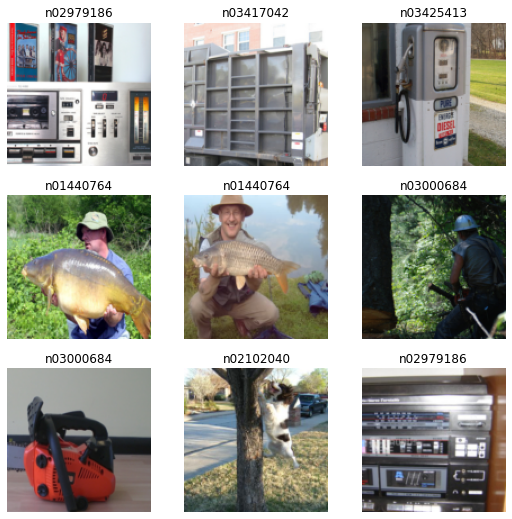

In [ ]:
dls.show_batch()

# translation of labels
lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

## 3) Training

In [ ]:
model = xresnet50(pretrained=False)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.783531,3.269937,0.350573,01:26
1,1.293327,1.739915,0.488153,01:25
2,1.056706,1.247647,0.598726,01:25
3,0.796571,0.791448,0.758471,01:25
4,0.641845,0.665232,0.788535,01:25


## Prediction for a new figure

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving ashley-with-carp.jpeg to ashley-with-carp.jpeg


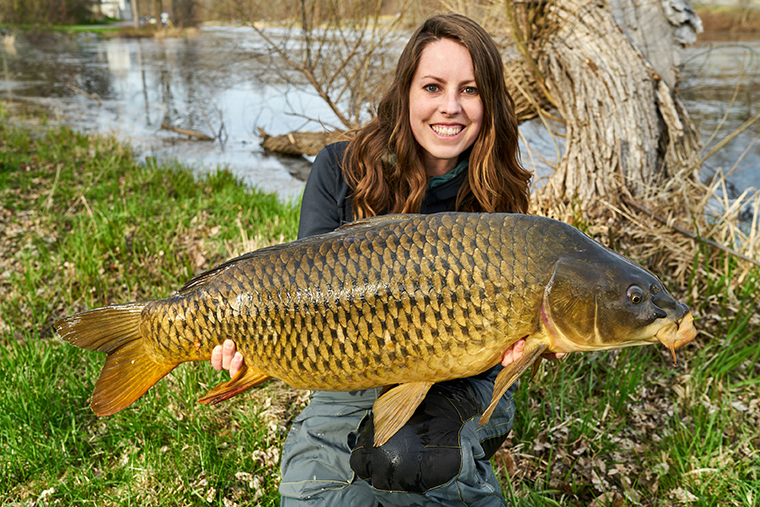

In [ ]:
img = PILImage.create(list(uploaded.values())[0])
img

In [ ]:
pred,_,_ = learn.predict(img)
lbl_dict[pred]

'tench'